In [11]:
import cv2
import matplotlib.pyplot as plt

In [25]:
cascade_path = "../models/haarcascade_frontalface_default.xml"
image_path = "../data/id_cards/id_1.png"



In [26]:
# Read the image
img = cv2.imread(image_path)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
print(img)

[[[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [247 243 242]
  [247 243 242]
  [247 243 242]]

 [[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [247 243 242]
  [247 243 242]
  [247 243 242]]

 [[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [247 243 242]
  [247 243 242]
  [247 243 242]]

 ...

 [[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [247 243 242]
  [247 243 242]
  [247 243 242]]

 [[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [247 243 242]
  [247 243 242]
  [247 243 242]]

 [[247 243 242]
  [247 243 242]
  [247 243 242]
  ...
  [246 242 241]
  [246 242 241]
  [246 242 241]]]


In [28]:
# Convert the image to grayscale (Haar cascade works better with grayscale images)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [29]:
# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

In [30]:
print(face_cascade)

< cv2.CascadeClassifier 000001E4E5E8EAD0>


In [31]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [32]:
# faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = img[new_y:new_y+new_h, new_x:new_x+new_w]

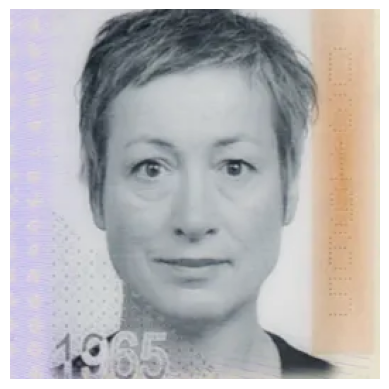

In [33]:
plt.imshow(extracted_face)
plt.axis('off')
plt.show()